In [6]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 3
plt.rcParams['ytick.minor.size']  = 3

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec




In [7]:
data_star=np.genfromtxt('2001ME1_red_star.csv',
                       dtype='float',delimiter=',')

data_object=np.genfromtxt('2001ME1_radial_bigcircles.csv',
                       dtype='float',delimiter=',')

small_circles=np.genfromtxt('small_black_dots.csv',
                       dtype='float',delimiter=',')
error_top=np.genfromtxt('errorbar_tops.csv',
                       dtype='float',delimiter=',')

error_bottom=np.genfromtxt('errorbar_bottoms.csv',
                       dtype='float',delimiter=',')

lower_error =  (error_bottom[:,1]-data_object[1:,1])*-1
upper_error =  error_top[:,1]-data_object[1:,1]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T



In [8]:
data_object_VLT=np.genfromtxt('vlt_big_circles.csv',
                       dtype='float',delimiter=',')

small_circles_VLT=np.genfromtxt('vlt_small_circles.csv',
                       dtype='float',delimiter=',')
error_top_VLT=np.genfromtxt('vlt_errors_top.csv',
                       dtype='float',delimiter=',')

error_bottom_VLT=np.genfromtxt('vlt_errors_bottom.csv',
                       dtype='float',delimiter=',')
data_star_VLT=np.genfromtxt('vlt_star.csv',
                       dtype='float',delimiter=',')

lower_error_VLT =  (error_bottom_VLT[:,1]-data_object_VLT[:,1])*-1
upper_error_VLT =  error_top_VLT[:,1]-data_object_VLT[:,1]
asymmetric_error_VLT = np.array(list(zip(lower_error_VLT, upper_error_VLT))).T


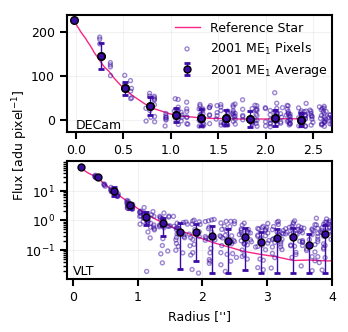

In [9]:
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(2, 1, tight_layout=False,figsize=(8.7*cm,8.7*cm),sharex=False,sharey=False
                       ,gridspec_kw={'hspace': 0.25, 'wspace': 0.3})
color1='#3a0ca3'
linewidth=1
size=30
smallsize=8
smallestsize=5
axs[0].plot(data_star[:,0],data_star[:,1],color='#f72585',lw=linewidth,label='Reference Star')
axs[0].errorbar(data_object[1:,0],data_object[1:,1],yerr=asymmetric_error,fmt='o',ms=smallestsize,lw=linewidth,capsize=2,
                             capthick=2,color=color1,ecolor=color1,mec='#000000',zorder=5,label=r'2001 ME$_1$ Average')

axs[0].scatter(small_circles[:,0],small_circles[:,1],color='none',
            marker='o',s=smallsize,lw=linewidth,label=r'2001 ME$_1$ Pixels'
            ,edgecolor= '#3a0ca3',zorder=4,alpha=0.5)
axs[0].scatter(data_object[:,0],data_object[:,1],
            c='#3a0ca3',marker='o',edgecolor= 'k', 
            lw=linewidth,s=size,zorder=5)#,#label=r'2001 ME$_1$ ',zorder=5)

fs=9

axs[0].grid(color='k',alpha=0.05)

axs[0].set_xlim([-0.1,2.7])
fig.text(-0.04, 0.5, r'Flux [adu pixel$^{-1}$]', va='center', rotation='vertical',fontsize=fs)

axs[1].set_xlabel('Radius [\'\']',fontsize=fs)

color1='#3a0ca3'

axs[0].legend(fancybox=True, framealpha=1, shadow=False, borderpad=.92,bbox_to_anchor=(1.05,1.1),
            frameon=False, loc='upper right', ncol=1)#,prop={'size': 15},facecolor='none')


axs[1].scatter(small_circles_VLT[:,0],small_circles_VLT[:,1],color='none',
            marker='o',s=smallsize,lw=linewidth,label=r'2001 ME$_1$ Pixel'
            ,edgecolor= '#3a0ca3',zorder=4,alpha=0.5)
axs[1].errorbar(data_object_VLT[:,0],data_object_VLT[:,1],yerr=asymmetric_error_VLT,fmt='o',ms=smallestsize,lw=linewidth,capsize=2,
                             capthick=2,color=color1,ecolor=color1,mec='#000000',zorder=5,label=r'2001 ME$_1$ Average')
axs[1].plot(data_star_VLT[:,0],data_star_VLT[:,1],color='#f72585',lw=linewidth,label='Star')

axs[1].set_yscale('log')
axs[1].set_yscale('log')
axs[1].grid(color='k',alpha=0.05)
fs2=9
axs[0].annotate(r'DECam',(0.0,-20),rotation=0,fontsize=fs2)

axs[1].annotate(r'VLT',(0.0,0.015),rotation=0,fontsize=fs2)

axs[1].set_xlim([-0.1,4])

plt.savefig('Figure6_Profiles_Vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)
